# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**? We would need to dumify the categorical variables: sex, island, species.

In [1]:
!pip install palmerpenguins

In [2]:
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

pen = load_penguins()
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
#Using get_dummies from pandas library and we are supplying it with a dataframe
pd.get_dummies(pen[['species']])

#When you give it the entire dataset it dummifies all the categorical variables.
#pd.get_dummies(pen)

,species_Adelie,species_Chinstrap,species_Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
339,False,True,False
340,False,True,False
341,False,True,False
342,False,True,False


In [4]:
enc = OneHotEncoder()

enc.fit(pen[['species']]) #Robot learns the categories of specified variable

enc.transform(pen[['species']]).toarray() #Transform the categories

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [5]:
#If you put in entire dataset it one hot encodes everything
enc = OneHotEncoder()

enc.fit(pen) #Robot learns the categories of specified variable

enc.transform(pen).toarray() #Transform the categories

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(pen[['bill_length_mm']])

array([[-0.88449874],
       [-0.81112573],
       [-0.66437972],
       [        nan],
       [-1.32473679],
       [-0.84781224],
       [-0.92118525],
       [-0.86615549],
       [-1.80166135],
       [-0.35254443],
       [-1.12296102],
       [-1.12296102],
       [-0.5176337 ],
       [-0.976215  ],
       [-1.70994508],
       [-1.34308004],
       [-0.95787175],
       [-0.26082817],
       [-1.74663159],
       [ 0.38118565],
       [-1.12296102],
       [-1.14130427],
       [-1.47148281],
       [-1.04958801],
       [-0.9395285 ],
       [-1.58154232],
       [-0.60934996],
       [-0.62769321],
       [-1.10461777],
       [-0.62769321],
       [-0.81112573],
       [-1.23302053],
       [-0.81112573],
       [-0.5543202 ],
       [-1.37976655],
       [-0.86615549],
       [-0.9395285 ],
       [-0.31585793],
       [-1.15964752],
       [-0.75609598],
       [-1.3614233 ],
       [-0.57266346],
       [-1.45313956],
       [ 0.03266386],
       [-1.26970704],
       [-0

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [7]:
pen = pen.dropna()

In [8]:
y = pen['bill_depth_mm']
X = pen[['bill_length_mm']]

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
lr_fit = lr.fit(X_train, y_train)
lr_fit.coef_

train_pred = lr_fit.predict(X_train)
test_pred = lr_fit.predict(X_test)
y_pred1 = lr_fit.predict(X)

In [12]:
y_pred_lr = lr_fit.predict(X_test)

In [13]:
#MSE for test data
from sklearn.metrics import r2_score, mean_squared_error
mean_squared_error(y_test, y_pred_lr)

3.4905661530569354

In [14]:
#MSE for train data
mean_squared_error(y_train, lr_fit.predict(X_train))

3.754659002572827

In [15]:
final_model = lr.fit(X, y)
final_model.coef_

array([-0.08232675])

In [16]:
#R squared for test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)


-0.05811676567007806

In [17]:
#R squared for train data
r2_score(y_train, lr_fit.predict(X_train))

0.04705596130872225

Now degree 2

In [18]:
X["x_sq"] = X["bill_length_mm"]**2
#X["x_cube"] = X["bill_length_mm"]**3
#X["x_10"] = X["bill_length_mm"]**10

<ipython-input-18-f0f37c0135ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["x_sq"] = X["bill_length_mm"]**2


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)
lr_fit.coef_

array([-1.28366989,  0.01371945])

In [20]:
y_pred_lr_train = lr_fit.predict(X_train)
y_pred_lr_test = lr_fit.predict(X_test)
y_pred2 = lr_fit.predict(X)

In [21]:
r2_score(y_train, y_pred_lr_train)

0.08677137442697958

In [22]:
r2_score(y_test, y_pred_lr_test)

0.17433821583189146

In [23]:
mean_squared_error(y_test, y_pred_lr_test)

3.1323286502647854

In [24]:
mean_squared_error(y_train, lr_fit.predict(X_train))

3.553053973559603

Now degree 3

In [25]:
X["x_cube"] = X["bill_length_mm"]**3

<ipython-input-25-57782590b23f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["x_cube"] = X["bill_length_mm"]**3


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)
lr_fit.coef_

array([ 4.72921753e+00, -1.22301911e-01,  1.01578502e-03])

In [27]:
y_pred_lr_train = lr_fit.predict(X_train)
y_pred_lr_test = lr_fit.predict(X_test)
y_pred3 = lr_fit.predict(X)

In [28]:
r2_score(y_train, y_pred_lr_train)

0.10406089681873643

In [29]:
r2_score(y_test, y_pred_lr_test)

0.20832188112614514

In [30]:
mean_squared_error(y_test, y_pred_lr_test)

3.082073826720805

In [31]:
mean_squared_error(y_train, lr_fit.predict(X_train))

3.445132592271414

Now adding degree 4, 5, 6, 7, 8, 9, 10 to the dataframe

In [32]:
X["x_cube"] = X["bill_length_mm"]**3
X["x_4"] = X["bill_length_mm"]**4
X["x_5"] = X["bill_length_mm"]**5
X["x_6"] = X["bill_length_mm"]**6
X["x_7"] = X["bill_length_mm"]**7
X["x_8"] = X["bill_length_mm"]**8
X["x_9"] = X["bill_length_mm"]**9
X["x_10"] = X["bill_length_mm"]**10
X

<ipython-input-32-2df70d5931e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["x_cube"] = X["bill_length_mm"]**3
<ipython-input-32-2df70d5931e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["x_4"] = X["bill_length_mm"]**4
<ipython-input-32-2df70d5931e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,bill_length_mm,x_sq,x_cube,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,39.1,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,39.5,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,40.3,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
4,36.7,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15
5,39.3,1544.49,60698.457,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15
...,...,...,...,...,...,...,...,...,...,...
339,55.8,3113.64,173741.112,9.694754e+06,5.409673e+08,3.018597e+10,1.684377e+12,9.398826e+13,5.244545e+15,2.926456e+17
340,43.5,1892.25,82312.875,3.580610e+06,1.557565e+08,6.775409e+09,2.947303e+11,1.282077e+13,5.577034e+14,2.426010e+16
341,49.6,2460.16,122023.936,6.052387e+06,3.001984e+08,1.488984e+10,7.385361e+11,3.663139e+13,1.816917e+15,9.011908e+16
342,50.8,2580.64,131096.512,6.659703e+06,3.383129e+08,1.718630e+10,8.730638e+11,4.435164e+13,2.253063e+15,1.144556e+17


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)
lr_fit.coef_

array([-1.17267551e-09, -5.09021454e-08, -1.15209793e-06, -1.96105814e-05,
       -1.83111835e-04,  1.76162072e-05, -6.85465804e-07,  1.34309958e-08,
       -1.32035211e-10,  5.19684668e-13])

In [34]:
y_pred_lr_train = lr_fit.predict(X_train)
y_pred_lr_test = lr_fit.predict(X_test)
y_pred10 = lr_fit.predict(X)

In [35]:
r2_score(y_train, y_pred_lr_train)

0.30415417165705727

In [36]:
r2_score(y_test, y_pred_lr_test)

0.23326757331900405

In [37]:
mean_squared_error(y_test, y_pred_lr_test)

3.3635419280733663

In [38]:
mean_squared_error(y_train, lr_fit.predict(X_train))

2.566777408043323

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The degree 10 polynomial model is overfitting the data because the train MSE is way better than the test MSE.

The simple linear regression model is underfit because the R - squared value is very low (0.05)

Based on all of the model's test and train MSE, the simple linear regression model is the best because it has the smallest difference.

Plotting...
Make predictions for each model and plot your fitted models on the scatterplot.

In [39]:
#import ggplot
from plotnine import *

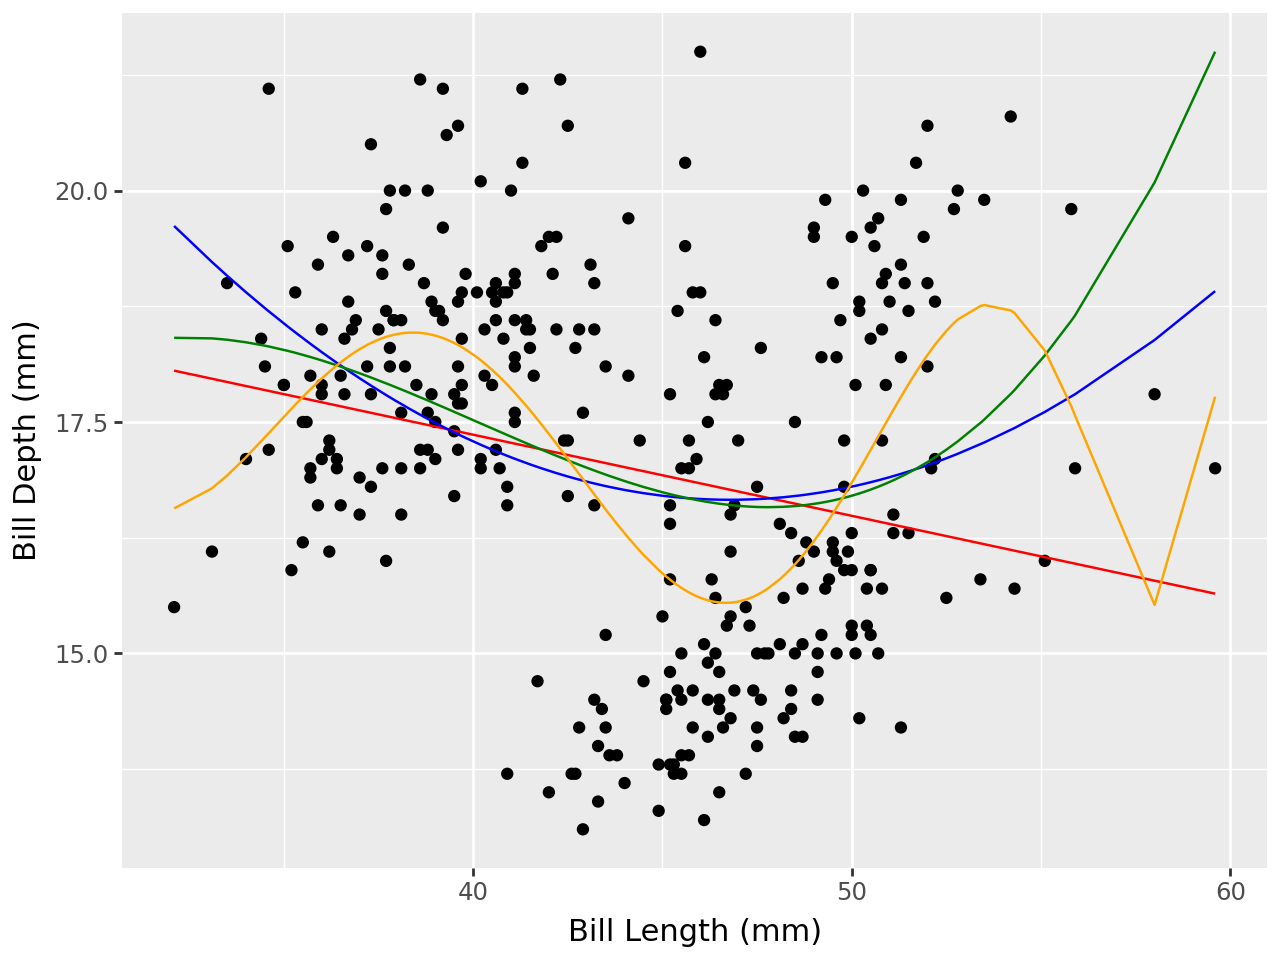

In [41]:
(
    ggplot(pen, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point() +
    labs(x='Bill Length (mm)', y='Bill Depth (mm)') +
    geom_line(aes(y=y_pred1), color='red')
     +
    geom_line(aes(y=y_pred2), color='blue') +
   geom_line(aes(y=y_pred3), color='green')+
    geom_line(aes(y=y_pred10), color='orange')
)
